upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN (1).csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")
dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.mean()))
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']
x = dataset[features]
y = dataset['quality'] 



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
dis=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
x=dis.fit_transform(x)



In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=3,shuffle=True)

Decison Tree Classifier - train test split

Confusion matrix for the Decison Tree using Gini index  :



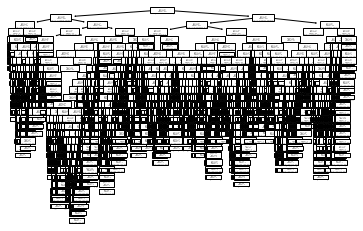

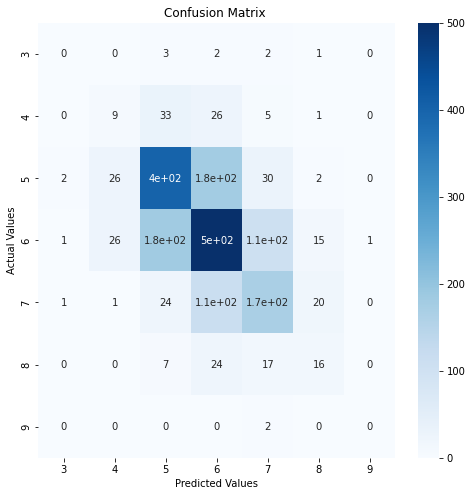



Confusion matrix for the Desion Tree using Entropy  :



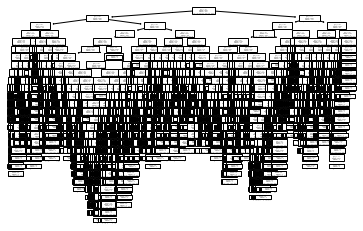

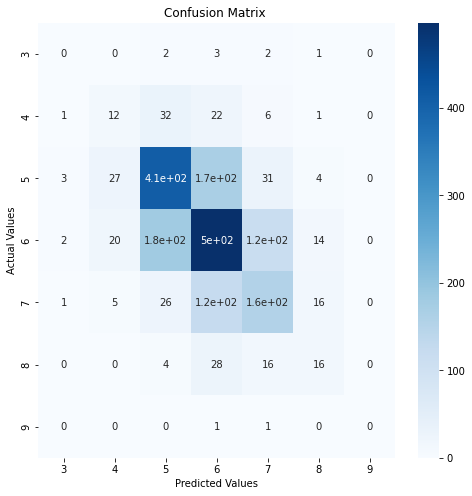



Splitting Criteria               Accuracy    Precision    Recall
-----------------------------  ----------  -----------  --------
Decison Tree using Gini index     56.2051      30.7882   30.1879
Desion Tree using Entropy         55.9487      45.4982   30.329


In [ ]:
from sklearn import tree
def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y,)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(8,8))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix '
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

table=[]
def res(model,xin,yin,xtest,ytest,criteria):
  model.fit(xin,yin)
  tree.plot_tree(model)
  y_pred=model.predict(xtest)
  print("Confusion matrix for the", criteria ," :\n")
  confusion(ytest,y_pred)
  accuracy=100*metrics.accuracy_score(ytest,y_pred)
  precision=100*metrics.precision_score(ytest,y_pred,average="macro",zero_division=1)#macro tells to find unweighted avg
  recall=100*metrics.recall_score(ytest,y_pred,average="macro",zero_division=1)
  table.append([criteria,accuracy,precision,recall])

def modelDefinition(criteria,descr):
  model=DecisionTreeClassifier(criterion=criteria,random_state=4)
  res(model,train_x,train_y,test_x,test_y,descr)


modelDefinition("gini","Decison Tree using Gini index")
modelDefinition("entropy","Desion Tree using Entropy")

print(tabulate(table,headers=["Splitting Criteria","Accuracy","Precision","Recall"]))






In [ ]:
import warnings
warnings.filterwarnings('ignore')
# to supress the zero division warnings

def met(k,model,modelName,cv,table):
  AccuracyScores=cross_val_score(model,x,y,scoring='accuracy',cv=cv)
  PrecisionScores=cross_val_score(model,x,y,scoring='precision_macro',cv=cv)
  RecallScores=cross_val_score(model,x,y,scoring='recall_macro',cv=cv)
  accuracy=round(100*np.mean(AccuracyScores),2)
  precision=round(100*np.mean(PrecisionScores),2)
  recall=round(100*np.mean(RecallScores),2)
  table.append([modelName,k,accuracy,precision,recall])

DecCL1=DecisionTreeClassifier(criterion="gini")
DecCL2=DecisionTreeClassifier(criterion="entropy")

# PERFORMANCES
print('\tCross validation results for different models and k values\n')
for i in range(5,11):
  table=[]
  cv=KFold(n_splits=i)
  met(i,DecCL1,"Gini Index",cv,table)
  met(i,DecCL2,"Entropy",cv,table)
  print(tabulate(table,headers=["Splitting criteria","K","Accuracy","Precision","Recall"]))
  print("\n-----------------------------------------------------------------------------\n")


	Cross validation results for different models and k values

Splitting criteria      K    Accuracy    Precision    Recall
--------------------  ---  ----------  -----------  --------
Gini Index              5        41.6        20.43     21.02
Entropy                 5        42          21.69     21

-----------------------------------------------------------------------------

Splitting criteria      K    Accuracy    Precision    Recall
--------------------  ---  ----------  -----------  --------
Gini Index              6       41.33        20.89     20.41
Entropy                 6       42.17        21.6      21.65

-----------------------------------------------------------------------------

Splitting criteria      K    Accuracy    Precision    Recall
--------------------  ---  ----------  -----------  --------
Gini Index              7       40.76        20.85     20.77
Entropy                 7       41.83        21.42     20.94

-------------------------------------------------

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving customDecisionTreeeDataset.xlsx to customDecisionTreeeDataset (1).xlsx


In [ ]:
cdataset=pd.DataFrame(pd.read_excel("customDecisionTreeeDataset.xlsx"))
cdataset

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,NO
1,<=30,high,no,excellent,NO
2,31…40,high,no,fair,YES
3,>40,medium,no,fair,YES
4,>40,low,yes,fair,YES
5,>40,low,yes,excellent,NO
6,31…40,low,yes,excellent,YES
7,<=30,medium,no,fair,NO
8,<=30,low,yes,fair,YES
9,>40,medium,yes,fair,YES


In [ ]:
def entropy(posSamples,negSamples):
  if posSamples==0 or negSamples==0:
    return 0
  P_plus=posSamples/(posSamples+negSamples)
  P_minus=negSamples/(posSamples+negSamples)
  return -P_plus*math.log2(P_plus)-P_minus*math.log2(P_minus)

def count(S,attribute,value):
  c=0
  for i in S[attribute]:
    if i==value:
      c=c+1
  return c

def countpair(S,attribute,label,attvalue,labelvalue):
  c=0
  for i in range(len(S[attribute])):
    if S[attribute][i]==attvalue and S[label][i]==labelvalue:
      c=c+1
  return c

def findunique(S,attribute):
  unique=set()
  for i in S[attribute]:
    unique.add(i)
  return unique



# To find root node
S=cdataset
features=['age','income','student','credit_rating']
output=['buys_computer']
count_p=count(S,"buys_computer","YES")
count_n=count(S,"buys_computer","NO")
len_s=count_p+count_n
# print(len_s,count_p,count_n)
Entropy_s=entropy(count_p,count_n)
# print(Entropy_s)
Gain=[]
for i in features:
  g=Entropy_s
  for val in findunique(S,i):
    countofval=count(S,i,val)
    count_val_p=countpair(S,i,output[0],val,"YES")
    count_val_n=countpair(S,i,output[0],val,"NO")
    entropyofval=entropy(count_val_p,count_val_n)  
    g=g-(countofval/len_s)*entropyofval
  
  Gain.append(g)

for i in range(len(Gain)):
  print("information gain for attribute:",features[i],"is",Gain[i])

print("Root element=",features[Gain.index(max(Gain))])


information gain for attribute: age is 0.2467498197744391
information gain for attribute: income is 0.029222565658954647
information gain for attribute: student is 0.15183550136234142
information gain for attribute: credit_rating is 0.04812703040826932
Root element= age


In [ ]:
def split(dataset,attribute,value,features):
  rows=[]
  for i in dataset.index:
    if dataset[attribute][i]==value:
      row=[]
      for j in features:
        if j!=attribute:
          row.append(dataset[j][i])
      rows.append(row)
  
  newDs=pd.DataFrame(rows,columns=features)
  return newDs

def createDS(S,attr,lis):
  ds=[]
  for i in findunique(S,attr):
    ds.append(split(S,attr,i,lis))
  return ds
list_age=['income','student','credit_rating','buys_computer']

Sage=createDS(S,"age",list_age)
index=[]
for i in range(len(Sage)):
  if len(findunique(Sage[i],'buys_computer'))==1:
    print("The following dataset has zero ambiguity, and the class is:",findunique(Sage[i],'buys_computer'))
    print(Sage[i])
    index.append(i)

features_age=['income','student','credit_rating']
output=['buys_computer']

Roots=[]
for k in range(len(Sage)):
  if k not in index:
    count_page=count(Sage[k],"buys_computer","YES")
    count_nage=count(Sage[k],"buys_computer","NO")
    len_sage=count_page+count_nage
    Entropy_sage=entropy(count_page,count_nage)
    Gain_age=[]
    for i in features_age:
      g=Entropy_sage
      for val in findunique(Sage[k],i):
        countofval=count(Sage[k],i,val)
        count_val_p=countpair(Sage[k],i,output[0],val,"YES")
        count_val_n=countpair(Sage[k],i,output[0],val,"NO")
        entropyofval=entropy(count_val_p,count_val_n)  
        g=g-(countofval/len_sage)*entropyofval

      Gain_age.append(g)

    print("\n\nDataset(",k,"):\n",Sage[k])
    for i in range(len(Gain_age)):
      print("information gain for attribute:",features_age[i],"is",Gain_age[i])
    print("Root element for the current dataset is=",features_age[Gain_age.index(max(Gain_age))])

print(index)
# print(Sage[0])
# print(Sage[1])
# print(Sage[2])

The following dataset has zero ambiguity, and the class is: {'YES'}
   income student credit_rating buys_computer
0    high      no          fair           YES
1     low     yes     excellent           YES
2  medium      no     excellent           YES
3    high     yes          fair           YES


Dataset( 1 ):
    income student credit_rating buys_computer
0    high      no          fair            NO
1    high      no     excellent            NO
2  medium      no          fair            NO
3     low     yes          fair           YES
4  medium     yes     excellent           YES
information gain for attribute: income is 0.5709505944546686
information gain for attribute: student is 0.9709505944546686
information gain for attribute: credit_rating is 0.01997309402197489
Root element for the current dataset is= student


Dataset( 2 ):
    income student credit_rating buys_computer
0  medium      no          fair           YES
1     low     yes          fair           YES
2     low    

In [ ]:
list_age_credit=['income','student','buys_computer']
Sage_credit=createDS(Sage[2],"credit_rating",list_age_credit)

list_age_student=['income','credit_rating','buys_computer']
Sage_student=createDS(Sage[1],"student",list_age_student)

for i in range(len(Sage_credit)):
  if len(findunique(Sage_credit[i],'buys_computer'))==1:
    print("\n\nThe following dataset has zero ambiguity, and the class is:",findunique(Sage_credit[i],'buys_computer'))
    print(Sage_credit[i])

for i in range(len(Sage_student)):
  if len(findunique(Sage_student[i],'buys_computer'))==1:
    print("\n\nThe following dataset has zero ambiguity, and the class is:",findunique(Sage_student[i],'buys_computer'))
    print(Sage_student[i])






The following dataset has zero ambiguity, and the class is: {'YES'}
   income student buys_computer
0  medium      no           YES
1     low     yes           YES
2  medium     yes           YES


The following dataset has zero ambiguity, and the class is: {'NO'}
   income student buys_computer
0     low     yes            NO
1  medium      no            NO


The following dataset has zero ambiguity, and the class is: {'YES'}
   income credit_rating buys_computer
0     low          fair           YES
1  medium     excellent           YES


The following dataset has zero ambiguity, and the class is: {'NO'}
   income credit_rating buys_computer
0    high          fair            NO
1    high     excellent            NO
2  medium          fair            NO
